# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd     
import numpy as np
import os     
import matplotlib.pyplot as plt 
import seaborn as sns      
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Konfigurasi agar visualisasi terlihat rapi
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Mengabaikan pesan warning agar output bersih

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('raw_data/water_potability.csv')  

### Menampilkan Dataset

In [3]:
df.head()  # Menampilkan 5 baris pertama dari dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Menampilkan Informasi Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Statistik Deskriptif

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Mengecek Keseimbangan Data (Potability)

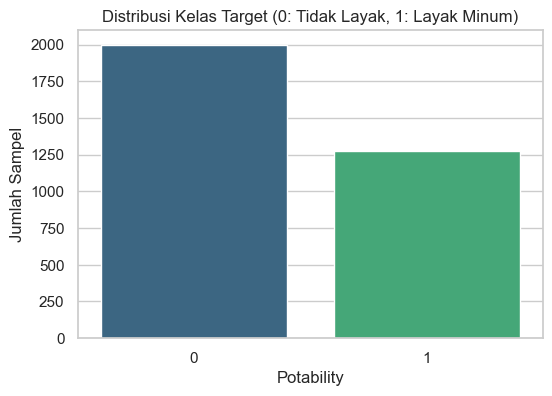

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (0: Tidak Layak, 1: Layak Minum)')
plt.xlabel('Potability')
plt.ylabel('Jumlah Sampel')
plt.show()

Berdasarkan grafik distribusi kelas di atas, terlihat bahwa dataset ini mengalami imbalance (ketidakseimbangan). Jumlah sampel untuk kelas 0 (Tidak Layak Minum) lebih mendominasi dibandingkan kelas 1 (Layak Minum), dengan perbandingan kasar sekitar 60:40. Ketidakseimbangan ini perlu diperhatikan saat evaluasi model nanti, karena akurasi model (accuracy) mungkin bisa menipu. Perlu dilakukan pemantauan metrik lain seperti F1-Score, Precision, atau Recall untuk memastikan model tidak bias ke kelas mayoritas (0).

### Analisis dan Visualisasi Missing Values

In [7]:
# Analisis Missing Values

missing_values = df.isnull().sum()
missing_only = missing_values[missing_values > 0]
print("\nKolom dengan Missing Values:\n", missing_only)


Kolom dengan Missing Values:
 ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64


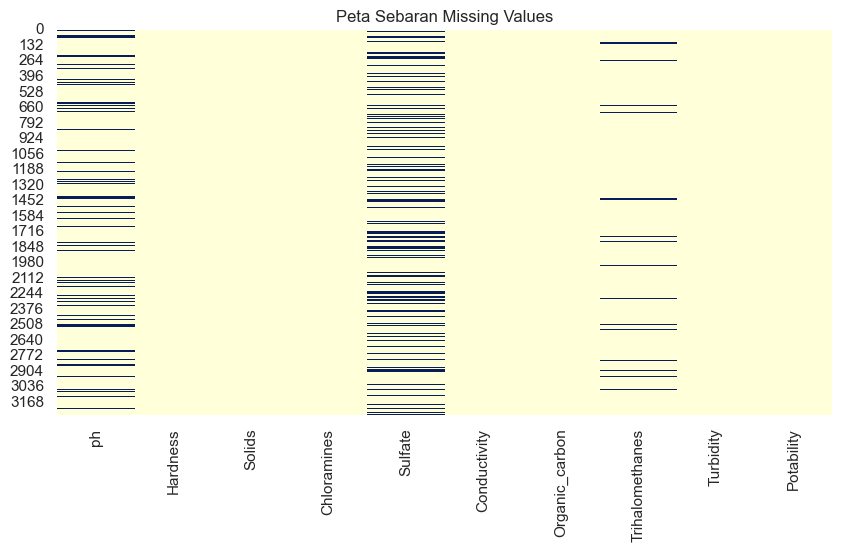

In [8]:
# Visualisasi missing values menggunakan heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Peta Sebaran Missing Values')
plt.show()

Heatmap menunjukkan adanya pola kekosongan pada tiga kolom, yaitu 'ph', 'sulfate', dan 'trihalometheanes'. Kolom 'sulfate' memiliki kekosongan data yang signifikan, diikuti oleh kolom 'ph' dan 'trihalometheanes'. Pola kekosongan terlihat menyebar secara acak, bukan mengelompok di satu blok baris tertentu. Karena jumlah data yang hilang cukup banyak, menghapus baris (drop rows) akan menyebabkan hilangnya informasi berharga secara signifikan. Oleh karena itu, strategi Imputasi (pengisian nilai) adalah langkah yang tepat. Mengingat distribusi data fitur-fitur ini umumnya mendekati normal, penggunaan nilai Mean (Rata-rata) adalah strategi yang aman untuk mengisi kekosongan tersebut.

### Mengecek Outlier

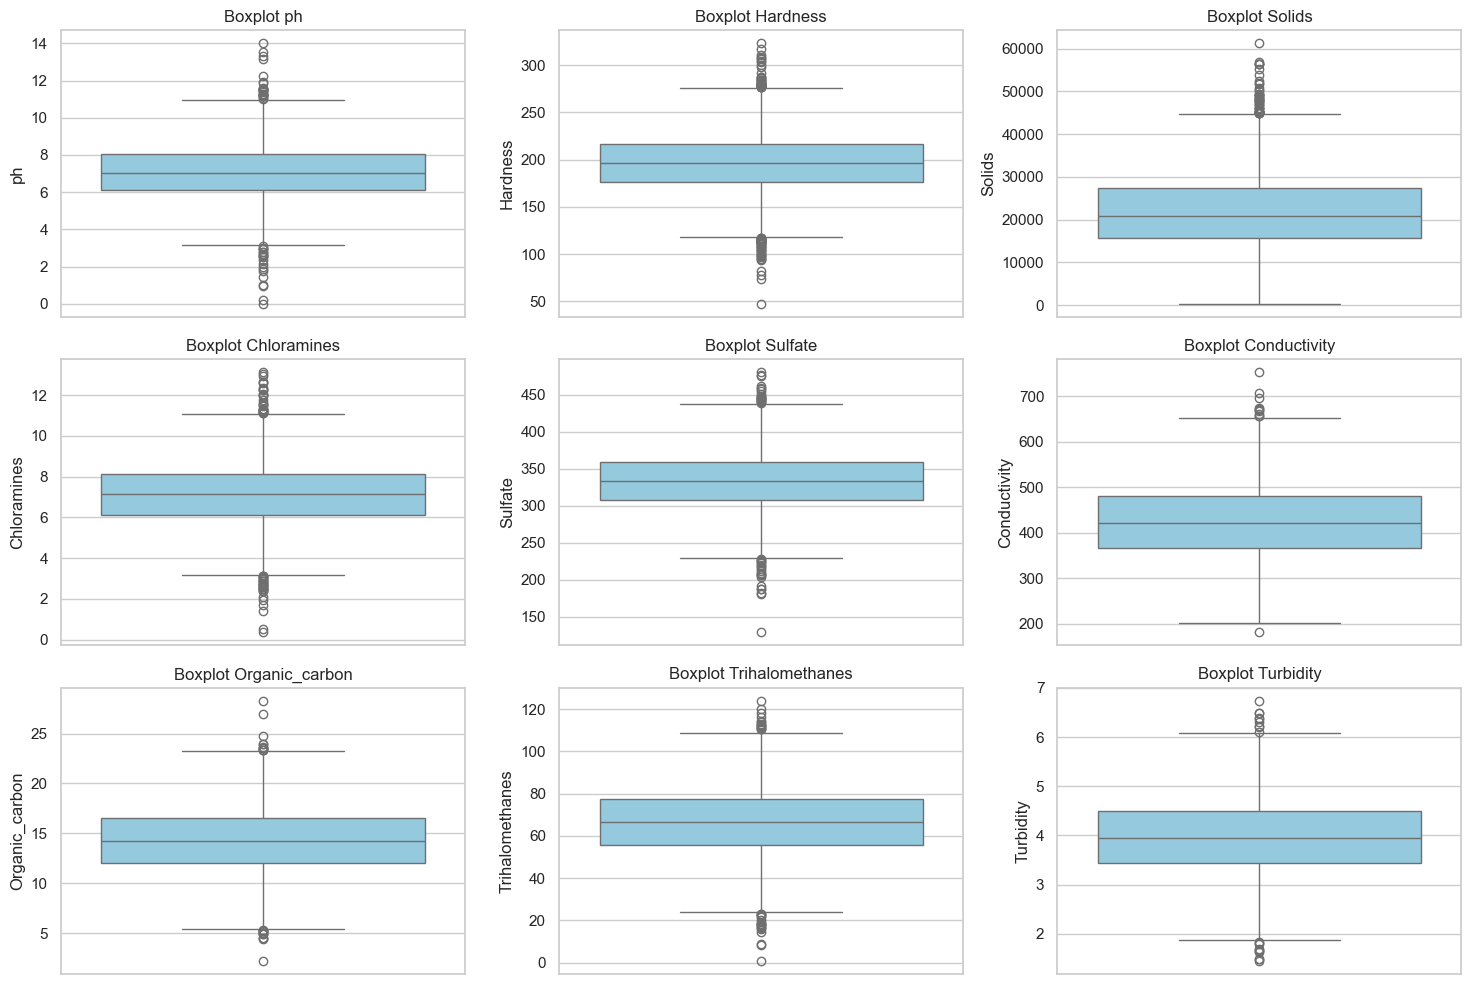

In [9]:
# Mengambil nama kolom fitur saja (Membuang kolom target 'Potability')
features = df.drop('Potability', axis=1).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1) # Membuat grid plot 3x3
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

Hampir seluruh fitur numerik menunjukkan adanya titik-titik hitam di luar whiskers boxplot, yang mengindikasikan adanya Outliers. Keberadaan outlier ini kemungkinan besar bersifat alamiah (variasi kandungan kimia air) dan bukan kesalahan input data. Oleh karena itu, outlier tidak akan dihapus agar model dapat belajar mengenali kondisi air ekstrem. Namun, perbedaan skala yang jauh mengharuskan dilakukannya Feature Scaling (StandardScaler) agar fitur bernilai besar seperti kolom 'Solids' tidak mendominasi proses pembelajaran model.

### Melihat Hubungan Fitur vs Target (Potability)

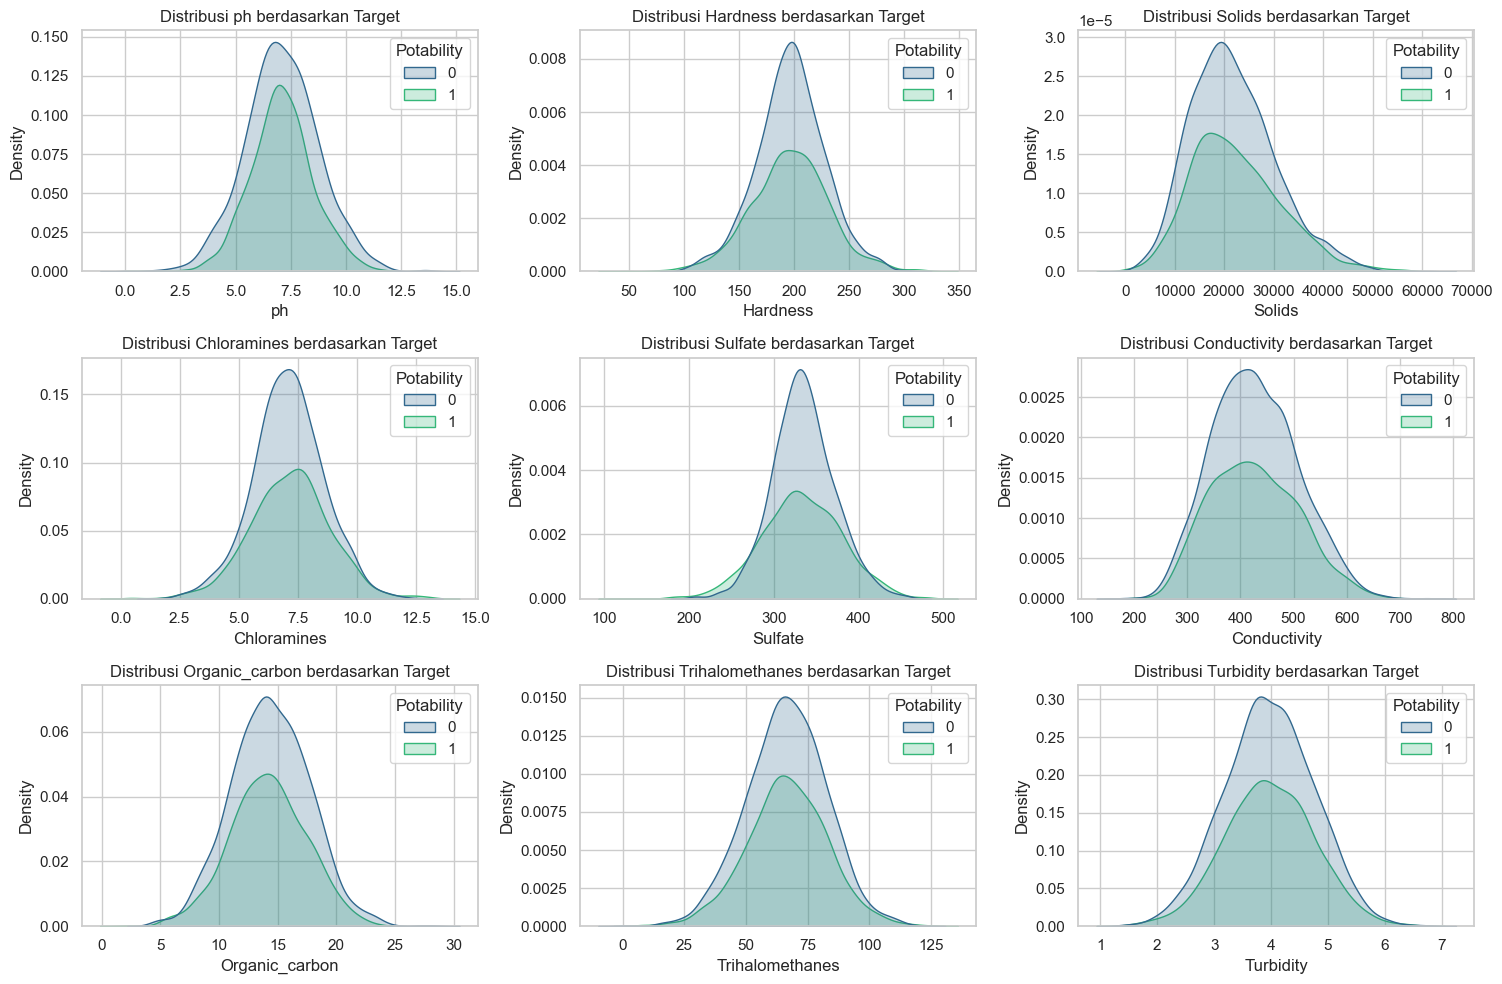

In [10]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    # KDE plot membandingkan distribusi kepadatan
    sns.kdeplot(x=df[col], hue=df['Potability'], fill=True, palette='viridis')
    plt.title(f'Distribusi {col} berdasarkan Target')

plt.tight_layout()
plt.show()

Grafik distribusi kepadatan (Density Plot) memperlihatkan tumpang tindih  yang sangat besar antara kurva kelas 0 (Biru) dan kelas 1 (Hijau) pada hampir semua fitur. Hal ini menunjukkan bahwa tidak ada satu pun fitur yang secara individu dapat memisahkan air layak/tidak layak dengan tegas. Model machine learning harus bekerja ekstra keras untuk menemukan kombinasi pola multi-dimensi untuk membedakan kedua kelas tersebut.

### Korelasi Fitur

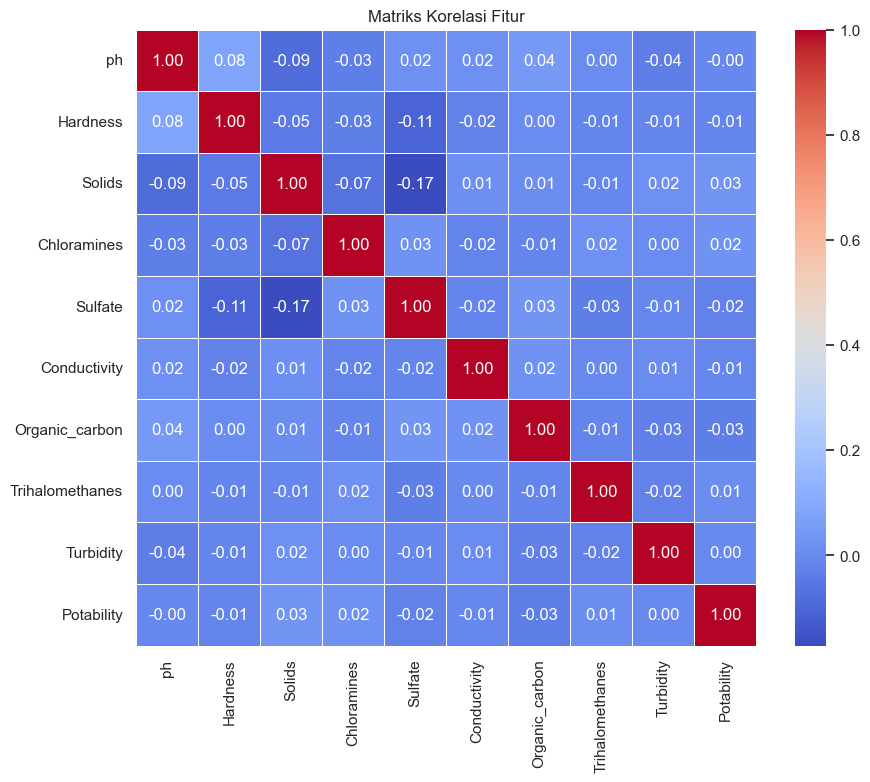

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()

Matriks korelasi menunjukkan warna yang didominasi biru muda dan merah pudar, dengan nilai koefisien korelasi yang sangat rendah (mendekati 0). Rendahnya korelasi linear terhadap target menunjukkan bahwa masalah ini tidak bisa diselesaikan dengan mudah menggunakan model linear sederhana (seperti Logistic Regression tanpa feature engineering). Dibutuhkan model non-linear yang lebih kompleks seperti Random Forest, SVM (dengan kernel RBF), atau XGBoost yang mampu menangkap pola hubungan yang rumit antar fitur untuk memprediksi kelayakan air.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Pemisahan Fitur (X) dan Target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split Data Train & Test
# Menggunakan 80% untuk Train dan 20% untuk Test
# stratify=y memastikan proporsi kelas 0 dan 1 di Train/Test tetap sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

# Membuat Pipeline Preprocessing
# Pipeline menggabungkan langkah Imputer dan Scaler menjadi satu objek
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mengisi data kosong dengan rata-rata
    ('scaler', StandardScaler())                  # Menstandarisasi skala data
])

# Fit & Transform 
# Melakukan .fit() hanya pada data latih agar model belajar parameter dari data latih saja
X_train_clean = preprocessing_pipeline.fit_transform(X_train)
X_test_clean = preprocessing_pipeline.transform(X_test)

#  Verifikasi Hasil 
# Mengubah kembali ke DataFrame untuk melihat hasil
X_train_df = pd.DataFrame(X_train_clean, columns=X.columns)

print("\nStatistik Data setelah Preprocessing")
display(X_train_df.describe().loc[['mean', 'std']])

print(f"\nApakah masih ada missing values? {np.isnan(X_train_clean).sum()}")

Shape X_train: (2620, 9)
Shape X_test: (656, 9)

Statistik Data setelah Preprocessing


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
mean,2.461136e-16,-2.122136e-16,4.610392e-17,6.766428e-16,2.610295e-16,1.083442e-15,-8.678385e-17,-1.206838e-16,-2.196716e-16
std,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00



Apakah masih ada missing values? 0


### Menyimpan hasil preprocessing

In [16]:
# Menentukan Nama Folder
output_folder = "water_potability_preprocessing"

# Membuat Folder tersebut jika belum ada
# exist_ok=True artinya: jika folder sudah ada, jangan error (biarkan saja)
os.makedirs(output_folder, exist_ok=True)

# Ubah hasil pipeline (NumPy array) menjadi DataFrame agar bisa digabung & diberi nama kolom
X_train_clean_df = pd.DataFrame(X_train_clean, columns=X.columns)
X_test_clean_df = pd.DataFrame(X_test_clean, columns=X.columns)

# Reset index target agar sejajar dengan DataFrame fitur
y_train_reset = y_train.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Menggabungkan Fitur dan Target
train_set = pd.concat([X_train_clean_df, y_train_reset], axis=1)
test_set = pd.concat([X_test_clean_df, y_test_reset], axis=1)

# Menentukan Path Lengkap (Folder + Nama File)
# os.path.join berguna agar path valid di Windows maupun Linux/Mac
train_path = os.path.join(output_folder, 'train_clean.csv')
test_path = os.path.join(output_folder, 'test_clean.csv')

# Menyimpan ke CSV
train_set.to_csv(train_path, index=False)
test_set.to_csv(test_path, index=False)

print(f"Folder '{output_folder}' berhasil dibuat/diakses.")
print(f"File Train disimpan di: {train_path}")
print(f"File Test disimpan di : {test_path}")

Folder 'water_potability_preprocessing' berhasil dibuat/diakses.
File Train disimpan di: water_potability_preprocessing\train_clean.csv
File Test disimpan di : water_potability_preprocessing\test_clean.csv
